#  IMAGE PROCESSING

In [220]:
# LOAD IMAGE TO NOTEBOOK & RESIZE IT 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
file_path = '/Users/trongduong/Dropbox/CQT internship/For Hoa/mnist0.jpeg'
img = Image.open(file_path)
# Use 10 qubits-- 2^6 = 64
newsize = (16,16)
img = img.resize(newsize)
img = img.save('resized_mnist0.jpg')

The Shape of the image is: (16, 16, 3)


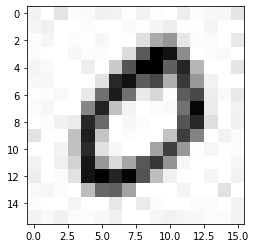

In [221]:
img=plt.imread('resized_mnist0.jpg')
print('The Shape of the image is:',img.shape)
plt.imshow(img)


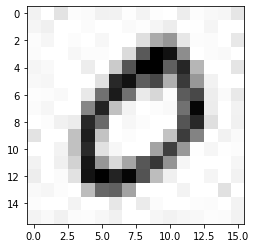

In [222]:
import sys
sys.path.append('/Users/trongduong/opt/anaconda3/envs/QML/lib/python3.7/site-packages')

import cv2
img= cv2.imread('resized_mnist0.jpg', 0) / 255
plt.imshow(img, cmap='gray')
plt.show()

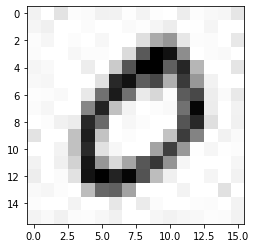

In [195]:
# ADD GAUSSIAN NOISE TO IMAGE 
noise = np.random.normal(0,0.,img.shape)
img_with_noise = img+noise
plt.imshow(img_with_noise, cmap='gray')

In [193]:
A = img_with_noise
A.shape

(16, 16)

# RUN QUANTUM QISKIT 

In [197]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit import QuantumCircuit, ParameterVector
from scipy import optimize

from qiskit.quantum_info import Operator
from qiskit.algorithms.optimizers import ADAM


# RUN USING REAL QUBIT -- QISKIT BACKEND 
TOKEN='13c09bd6bcd75f7510d5e9bde97dedd79d783a9e708000d317c385fa2f81b9229f4d3ec0844cf77e1e664b61cbc861ea8b87b6c5cca367b61e5f9d514a3c1316'
IBMQ.save_account(TOKEN)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
for backend in provider.backends():
    try:
        qubit_count= len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name} has {backend.status().pending_jobs} queued {qubit_count} qubits")

# Incomplete code 
from qiskit.tools.monitor import job_monitor 
backend = provider.get_backend('')
job = IBMQ.execute(###, backend = backend)
job_monitor(job)
    

In [12]:
def create_circuit(num_qubits, num_layers):
    
    ###BUILD CIRCUIT1
    circuit1 = QuantumCircuit(num_qubits)
    params1 = ParameterVector('P1')

    for l in range(num_layers):
        for i in range(num_qubits):
            params1.resize(len(params1)+1)
            circuit1.rx(params1[-1],i)
            params1.resize(len(params1)+1)
            circuit1.rz(params1[-1],i)

        for i in range(num_qubits-1,0,-1):
            circuit1.cnot(i,i-1)
        circuit1.barrier()
        
    for i in range(num_qubits):
        params1.resize(len(params1)+1)
        circuit1.rx(params1[-1],i)
        params1.resize(len(params1)+1)
        circuit1.rz(params1[-1],i)
        
    return circuit1


In [81]:
create_circuit(5,3).draw()

┌───────────┐┌───────────┐               ┌───┐ ░ ┌────────────┐»
q_0: ┤ Rx(P1[0]) ├┤ Rz(P1[1]) ├───────────────┤ X ├─░─┤ Rx(P1[10]) ├»
     ├───────────┤├───────────┤          ┌───┐└─┬─┘ ░ ├────────────┤»
q_1: ┤ Rx(P1[2]) ├┤ Rz(P1[3]) ├──────────┤ X ├──■───░─┤ Rx(P1[12]) ├»
     ├───────────┤├───────────┤     ┌───┐└─┬─┘      ░ ├────────────┤»
q_2: ┤ Rx(P1[4]) ├┤ Rz(P1[5]) ├─────┤ X ├──■────────░─┤ Rx(P1[14]) ├»
     ├───────────┤├───────────┤┌───┐└─┬─┘           ░ ├────────────┤»
q_3: ┤ Rx(P1[6]) ├┤ Rz(P1[7]) ├┤ X ├──■─────────────░─┤ Rx(P1[16]) ├»
     ├───────────┤├───────────┤└─┬─┘                ░ ├────────────┤»
q_4: ┤ Rx(P1[8]) ├┤ Rz(P1[9]) ├──■──────────────────░─┤ Rx(P1[18]) ├»
     └───────────┘└───────────┘                     ░ └────────────┘»
«     ┌────────────┐               ┌───┐ ░ ┌────────────┐┌────────────┐     »
«q_0: ┤ Rz(P1[11]) ├───────────────┤ X ├─░─┤ Rx(P1[20]) ├┤ Rz(P1[21]) ├─────»
«     ├────────────┤          ┌───┐└─┬─┘ ░ ├────────────┤├────────────┤     »
«q_1: ┤ Rz(P1[13]) ├──────────┤ X ├──■───░─┤ Rx(P1[22]) ├┤ Rz(P1[23]) ├─────»
«     ├────────────┤     ┌───┐└─┬─┘      ░ ├────────────┤├────────────┤     »
«q_2: ┤ Rz(P1[15]) ├─────┤ X ├──■────────░─┤ Rx(P1[24]) ├┤ Rz(P1[25]) ├─────»
«     ├────────────┤┌───┐└─┬─┘           ░ ├────────────┤├────────────┤┌───┐»
«q_3: ┤ Rz(P1[17]) ├┤ X ├──■─────────────░─┤ Rx(P1[26]) ├┤ Rz(P1[27]) ├┤ X ├»
«     ├────────────┤└─┬─┘                ░ ├────────────┤├────────────┤└─┬─┘»
«q_4: ┤ Rz(P1[19]) ├──■──────────────────░─┤ Rx(P1[28]) ├┤ Rz(P1[29]) ├──■──»
«     └────────────┘                     ░ └────────────┘└────────────┘     »
«               ┌───┐ ░ ┌────────────┐┌────────────┐
«q_0: ──────────┤ X ├─░─┤ Rx(P1[30]) ├┤ Rz(P1[31]) ├
«          ┌───┐└─┬─┘ ░ ├────────────┤├────────────┤
«q_1: ─────┤ X ├──■───░─┤ Rx(P1[32]) ├┤ Rz(P1[33]) ├
«     ┌───┐└─┬─┘      ░ ├────────────┤├────────────┤
«q_2: ┤ X ├──■────────░─┤ Rx(P1[34]) ├┤ Rz(P1[35]) ├
«     └─┬─┘           ░ ├────────────┤├────────────┤
«q_3: ──■─────────────░─┤ Rx(P1[36]) ├┤ Rz(P1[37]) ├
«                     ░ ├────────────┤├────────────┤
«q_4: ────────────────░─┤ Rx(P1[38]) ├┤ Rz(P1[39]) ├
«                     ░ └────────────┘└────────────┘

In [105]:
# FUNCTION 
def func(x, *args):
    A, qc1, qc2, rank, weight = args
    
    assert qc1.num_qubits == qc2.num_qubits, "Two circuits must have the same dimension."
    num_qubits = qc1.num_qubits
    if weight is None:
        weight = np.arange(num_qubits * rank, 0, -num_qubits)
    
    a = x[:qc1.num_parameters]
    b = x[qc1.num_parameters:]
    U = Operator(qc1.bind_parameters(a)).data
    V = Operator(qc2.bind_parameters(b)).data

    #Optimize la optimize cai tong 
    
    m = np.zeros(rank, dtype=np.complex128)
    
    AV = A @ V
    m = np.real(np.einsum('ij,ji->i', U.conj().T,AV))[:rank]
    s = np.dot(weight, m)
    
    print(s)
    return -s

In [167]:
def optimize_svd(A, circuit1, circuit2, rank, optimizer):
    args = (A, circuit1, circuit2, rank, None)
    x0 = 2*np.pi*np.random.rand(circuit1.num_parameters+circuit2.num_parameters)
    
    if optimizer == 'ADAM': 
        optimizer = ADAM(maxiter=100,
                         tol=1e-6,
                         lr=1e-1,
                         beta_1=0.7,
                         beta_2=0.99,
                         noise_factor=1e-6,
                         eps=1e-6,
                         amsgrad=True)
        f = optimizer.wrap_function(func,args)
        result = optimizer.minimize(f,x0)
    else:
        result = optimize.minimize(func,x0, args,method="BFGS",tol=0.1)
    
    a = result.x[:circuit1.num_parameters]
    b = result.x[circuit1.num_parameters:]
    bound_circuit1 = circuit1.bind_parameters(a)
    bound_circuit2 = circuit2.bind_parameters(b)

    U = Operator(bound_circuit1).data
    V = Operator(bound_circuit2).data
    
    u=[]
    v=[]
    dim=2**circuit1.num_qubits
    
    for i in range(rank):
        u.append(U[:,i])
        v.append(V[:,i])
    u = np.array(u)
    v = np.array(v)
        
    AV = A @ V
    m = np.real(np.einsum('ij,ji->i', U.conj().T,AV))[:rank]
        
    #d = sorted(m, reverse=True)
    inds = np.argsort(-m, kind='stable')
    print(m)
    print(inds)
    d = m[inds]
    u = u[inds]
    v = v[inds]
    return d,u,v


In [198]:
circuit1 = create_circuit(4,4)
circuit2 = create_circuit(4,4)

In [210]:
rank = 10

In [211]:
print('image shape =', A.shape)
d,u,v = optimize_svd(A,circuit1,circuit2,rank,None)

image shape = (16, 16)
-16.522812306311724
-16.52281222459174
-16.52281194941608
-16.522812293612617
-16.522812043160318
-16.522812107010992
-16.522812748072425
-16.522813090478298
-16.52281247483351
-16.522812408817064
-16.522812419544174
-16.522811860098308
-16.52281228515637
-16.522812036530276
-16.522811816853878
-16.522812272838614
-16.522812443829057
-16.52281210736084
-16.522812796268948
-16.52281220538566
-16.52281249957856
-16.522812299613086
-16.522811167058155
-16.522812341938042
-16.522812117621076
-16.522812672381193
-16.522812504150778
-16.52281181889352
-16.522812403584858
-16.522812284518466
-16.52281250154796
-16.522812674140635
-16.522812701389157
-16.522812690402528
-16.522812316055788
-16.52281183198057
-16.522812190530214
-16.52281241880188
-16.52281203800219
-16.52281308386571
-16.52281212554457
-16.52281229830044
-16.522812543084456
-16.522812561351724
-16.522812773098625
-16.522812072835993
-16.52281274148844
-16.522812138804955
-16.522812233983895
-16.522812442

355.50285354722484
355.5028535298428
355.50285323743464
355.50285294423657
355.5028531522033
355.5028534503413
355.5028532555811
355.50285366704367
355.50285361402143
355.5028534433477
355.50285352874675
355.50285306417
355.50285355084526
355.50285312479525
355.502852899789
355.5028531283853
355.50285324241105
355.50285372309264
355.5028533729752
355.50285323375124
355.50285338598667
355.5028531729626
355.5028533448189
355.50285355626625
355.5028531413922
355.50285383218323
394.4148401677685
394.4148401048077
394.4148402915744
394.4148400068995
394.41484022975413
394.414840156614
394.4148404062559
394.4148404265446
394.4148405109246
394.41484012815414
394.4148397080949
394.41483989816965
394.41484025471766
394.41483975956015
394.4148399570063
394.4148405974943
394.41483989440025
394.4148401654262
394.41484013082004
394.41483989691517
394.41484032167546
394.41483974272603
394.4148398965259
394.4148396191718
394.4148397535996
394.41484011413934
394.4148403233473
394.41484029543864
394.41

472.9707732663674
472.9707729977675
472.9707726641811
472.9707735635722
472.9707723680482
472.970773021187
472.97077238241775
472.9707724374554
472.97077249588085
472.9707728919328
472.97077273451396
472.97077291626834
472.97077255141255
472.9707726667257
472.97077263140756
472.97077276880526
472.97077249060806
472.9707724802438
472.9707725055425
472.97077318104255
472.97077214644946
472.97077287097625
472.9707730284586
472.97077248946067
472.9707727991243
472.97077261379127
472.9707728965629
472.9707725538171
472.97077277124896
472.9707727568172
472.9707729478745
472.97077268504387
472.9707728246411
472.9707733449041
472.9707730492657
472.9707731893322
472.97077284771393
472.97077285958
472.9707727592202
472.9707726839791
472.9707731147494
472.9707729667705
472.9707725155029
472.9707723958803
472.9707728935091
472.9707730634714
472.97077274838864
472.9707728827475
472.9707726497991
472.9707731379194
472.9707726441636
472.97077243874423
472.9707727970315
472.9707728056721
472.970772905

526.7780761011963
526.7780761175753
526.7780756705093
526.7780761335972
526.7780762728381
526.7780762652053
526.7780760988448
526.7780761209177
526.7780759327484
534.5560885496019
534.5560884946652
534.556088795965
534.5560881590542
534.5560882147249
534.5560884850962
534.5560883691855
534.5560883185856
534.5560888908519
534.5560887642745
534.5560886593262
534.5560881465688
534.556088258015
534.556088469287
534.5560883514976
534.5560883390727
534.5560882220228
534.5560887643849
534.5560882072325
534.5560885373412
534.5560885821932
534.5560883542065
534.5560887386969
534.5560884958569
534.5560884756071
534.5560886861633
534.5560886333375
534.5560885548846
534.5560883544917
534.5560886904285
534.5560882189405
534.5560885157404
534.5560887438489
534.55608868937
534.5560884893858
534.5560884942993
534.5560882265887
534.5560883350335
534.5560885389635
534.5560883719471
534.5560886274114
534.5560885103872
534.5560883387637
534.5560888279091
534.5560885021433
534.5560885454556
534.55608836084

562.4849621111471
562.4849619891936
562.4849622888121
562.4849619254517
562.4849619908629
562.4849619867117
562.4849620762872
562.4849620240549
562.4849622107961
562.4849620550787
562.4849618908154
562.4849622987225
567.0435544860251
567.0435544776839
567.0435546331586
567.0435543617808
567.0435543560476
567.0435544882519
567.0435545078423
567.0435544555882
567.0435542892658
567.043554367821
567.0435544784874
567.0435543311248
567.0435544187052
567.0435545842965
567.043554545711
567.0435546294589
567.0435546480968
567.0435543688318
567.0435543078584
567.0435547394093
567.04355437023
567.0435545322351
567.043554501851
567.0435541847746
567.0435547129043
567.0435543689309
567.0435546775643
567.0435547411776
567.0435545519216
567.0435546266043
567.0435544728797
567.0435543794569
567.0435543529455
567.0435543678144
567.0435546437769
567.0435543688112
567.0435546967637
567.0435545087212
567.043554508784
567.043554486159
567.0435545447269
567.0435544633074
567.0435544159982
567.0435546904583

588.7347983919598
588.734798101755
588.7347980449358
588.7347978458627
588.7347978997576
588.7347976980159
588.7347978702483
588.734797851945
588.7347979519061
588.7347978773653
588.7347979796637
588.7347978553561
588.7347980412989
588.7347981803946
588.7347982031084
588.7347979441547
588.7347981963673
588.7347981074895
588.7347979812605
588.7347978241612
588.7347978119647
588.7347981991853
588.7347978939472
588.7347979375884
588.7347980056113
588.7347981200132
588.734797857394
588.7347979261579
588.7347980403423
588.7347980353319
588.7347980226886
588.7347979679523
588.7347979100451
588.7347980166722
592.0760965591473
592.0760965492104
592.0760965729544
592.0760968741498
592.076096483476
592.0760965023617
592.0760966029553
592.0760963594666
592.0760965157632
592.0760965605442
592.0760966058253
592.0760967851049
592.0760964155731
592.0760964459307
592.0760966200132
592.0760964741401
592.0760965768732
592.0760965707838
592.0760965920782
592.0760964781829
592.0760967841544
592.0760967324

599.4867672712338
599.4867676453503
599.4867675937446
599.4867676533704
599.4867673649136
599.4867675647432
599.4867674562394
599.486767314312
599.4867677021632
599.4867675504349
599.486767762459
599.4867676845486
599.4867673993627
599.4867675095081
599.4867672412404
599.48676751822
599.4867674243302
599.4867677306057
599.4867675785308
599.4867674722533
599.4867673357454
599.4867675387691
599.4867676618172
599.486767237704
599.4867675117924
599.4867673993446
599.4867675681131
599.4867674642232
599.486767714833
599.486767402042
599.4867673788776
599.486767425889
599.4867676121619
599.4867676627644
599.486767546211
599.4867674250872
599.4867677339925
599.4867676887944
599.4867672357897
599.48676749441
599.4867674055799
599.4867676686516
599.4867674621995
599.4867674291205
599.4867676706799
599.4867677187577
599.486767694822
599.4867673629361
599.4867676588672
599.4867674965827
599.4867672758836
599.4867675161764
601.3164572733554
601.3164574152628
601.3164572338878
601.3164574098425
601.

607.8346892962891
607.8346891889408
607.8346893410668
607.8346889770527
607.8346893354149
607.8346891366957
607.8346890736278
607.834689347013
607.8346890043453
607.8346892180937
607.8346892809316
607.834688998757
607.8346889542512
607.8346890850743
607.8346891004829
607.83468894475
607.8346891774484
607.8346892561789
607.83468933063
607.8346889741022
607.834689305544
607.8346890713351
607.8346889704019
607.834689380773
607.8346890378979
607.8346893615902
607.8346893411098
607.8346891200316
607.8346893229424
607.8346891775541
607.8346892544474
607.8346892596891
607.8346893434494
607.8346891580699
607.8346893020298
607.8346890195743
607.8346890143582
607.8346893674459
607.8346892827151
607.8346889499445
607.8346889326596
607.8346891670656
607.8346890868056
607.834689339897
607.8346893299267
607.8346889817592
607.8346890230957
607.8346891537216
607.8346893600543
607.8346892220749
607.8346889735501
607.8346893504514
607.8346896486066
607.834689228309
607.834688968763
607.8346892690108
607

616.31786224124
616.3178625926349
616.3178626393579
616.3178624326699
616.3178624095525
616.3178624617051
616.3178625979633
616.3178623870033
616.317862540055
616.3178624169129
616.3178623634483
616.3178623135453
616.3178624817892
618.5884503395913
618.5884502476055
618.588450462754
618.5884503446277
618.5884504333706
618.5884502484639
618.5884503235026
618.5884504019945
618.5884503213744
618.5884503648496
618.5884503546578
618.5884503782625
618.5884505392826
618.5884502954679
618.5884503392895
618.5884504580735
618.5884503488616
618.5884503650844
618.5884503351501
618.5884502357263
618.5884502943329
618.5884504351812
618.5884503443274
618.5884504688914
618.5884503538159
618.588450298934
618.5884503109189
618.5884502334565
618.5884503016961
618.5884502271401
618.5884504343541
618.588450319127
618.5884504186348
618.588450281
618.5884505087794
618.5884503025986
618.588450206808
618.5884503793027
618.5884501112178
618.5884503519239
618.5884504351833
618.5884504416484
618.5884502516661
618

623.8156566817963
623.8156566217536
623.8156565261226
623.8156564739556
623.8156567710769
623.8156565261817
623.8156565367536
623.815656643818
623.815656622539
623.8156565757947
623.8156565360568
623.8156567355737
623.8156564626372
623.8156566267747
623.8156566934053
623.8156565745549
623.8156565644676
623.8156564781797
623.8156565379917
623.8156565621904
623.8156564931313
623.8156566055925
623.8156564790735
623.8156567719328
623.815656491374
623.8156565720374
623.8156566413356
623.8156566148655
623.8156565096605
623.8156566200909
623.8156564158011
623.8156565765609
623.8156567376133
623.8156565951097
623.8156566473269
623.8156564584374
623.8156566226062
625.3918312868725
625.3918312171359
625.3918314222998
625.3918312821588
625.3918313334767
625.3918311876192
625.3918313077363
625.3918313370252
625.3918312592285
625.3918313091042
625.3918313232529
625.3918313470347
625.3918314280447
625.3918312848257
625.3918312896383
625.3918312468026
625.3918313111798
625.3918313260634
625.391831206

629.1179641484346
629.1179641755862
629.1179641739915
629.1179641795718
629.1179642432035
629.1179643166681
629.1179642145386
629.1179642135256
629.1179642293188
629.1179642043859
629.117964105571
629.1179642755507
629.1179642320911
629.1179641706054
629.1179640874963
629.1179640951424
629.1179641984937
629.1179641447437
629.1179642359824
629.1179641852763
629.1179640795144
629.1179641985011
629.1179642339712
629.1179641363617
629.1179640978465
629.117964136311
629.1179641082871
629.11796430915
629.1179641109964
629.1179642220856
629.1179642695041
629.1179641158826
629.1179641120779
629.1179641547004
629.1179640075155
629.1179641880391
629.1179643636166
629.1179642592238
629.1179641344004
629.1179642424241
629.1179641391815
630.4684501416723
630.4684500836867
630.4684501417007
630.4684501552734
630.4684502022294
630.4684500432828
630.468450217877
630.468450218257
630.4684501669518
630.4684501634116
630.4684501556027
630.4684501904603
630.4684502655597
630.4684501588152
630.468450124493

635.0457540750305
635.0457540911625
635.0457539140087
635.04575398459
635.0457539614036
635.0457539821969
635.0457540991357
635.0457539432354
635.0457540387494
635.0457540488901
635.0457539152275
635.0457539982996
635.0457541111117
635.0457540564472
635.0457539519646
635.045754089863
635.045754060108
635.0457539733821
635.0457539724675
635.0457539036855
635.0457539503669
635.045753960548
635.0457539969218
635.0457540918266
635.0457540630342
635.0457540536153
635.0457540397091
635.0457539297086
635.0457540937456
635.0457539471186
635.0457540839955
635.0457537918007
635.0457540766881
635.0457539340792
635.0457540344206
635.0457540463917
635.0457540268009
635.045754190691
635.0457538785769
635.0457542015296
635.0457539123228
635.0457540013854
635.0457537759659
635.045753959085
635.0457540586474
635.0457540392297
635.0457540276867
635.0457539709458
635.0457539157936
635.0457538519145
635.0457539475474
635.0457539939625
635.0457540179817
635.0457539211058
635.0457538011591
635.0457539696329

639.8407607070205
639.8407608816175
639.8407606595789
639.8407608131328
639.8407608227025
639.8407608665729
639.8407607495211
639.8407608681688
639.8407607303983
640.6862240545574
640.6862241361706
640.6862240638486
640.6862240536811
640.6862240360529
640.6862240053939
640.6862240502358
640.6862241014752
640.6862241153544
640.6862240656202
640.6862241920752
640.6862240944616
640.6862240177688
640.6862240494215
640.6862240819677
640.6862240935682
640.6862240010987
640.6862240334084
640.6862240824378
640.686224089606
640.6862240770348
640.6862241657473
640.6862240638783
640.6862241697369
640.6862240614965
640.6862240324851
640.6862242125235
640.6862240427711
640.6862240438826
640.6862240281365
640.6862240302816
640.6862239744097
640.686224153218
640.6862240600103
640.6862240575391
640.6862240482146
640.6862240058632
640.6862240336583
640.6862240116462
640.6862239429549
640.6862241634775
640.6862239635649
640.6862240251318
640.6862240526752
640.6862240921276
640.6862240452106
640.68622405

643.2502928603919
643.2502929076308
643.2502927939994
643.25029290149
643.2502928305975
643.2502928722181
643.2502928151538
643.2502928958855
643.2502927355267
643.250292753865
643.2502927821349
643.2502928483909
643.2502928988151
643.250292865504
643.2502928477574
643.2502928980334
643.25029279393
643.2502927900924
643.250292789008
643.2502928255492
643.2502928440698
643.2502928619223
643.2502928473112
643.2502929107912
643.2502927997076
643.2502928356859
643.2502927850372
643.2502928745357
643.2502928281942
643.2502928307932
643.2502927938363
643.9171741632128
643.9171742145353
643.9171742903144
643.9171741737848
643.9171741365591
643.917174173443
643.9171741863223
643.9171741595281
643.9171741854121
643.9171741345825
643.9171743348479
643.9171742025486
643.9171741289914
643.9171740981697
643.9171741850073
643.9171741065365
643.9171741433197
643.9171741254561
643.9171740572674
643.917174164356
643.9171741789781
643.9171742286679
643.9171741266466
643.9171743043885
643.9171742081834
6

646.8422027362072
646.8422027587222
646.842202797034
646.8422027654732
646.8422027834011
646.8422028235578
646.8422027189827
646.8422027713992
646.8422028011735
646.8422027609556
646.8422027168403
646.8422027532387
646.8422027699129
646.8422027757783
646.842202803751
646.8422027407606
646.8422027245005
646.842202726595
646.8422027985753
646.8422028260359
646.8422027333875
646.8422027344058
646.8422028076122
646.8422027793446
646.8422027251546
646.8422026663728
646.8422027698043
646.8422028557758
646.8422027844023
646.8422027335607
646.8422028228846
646.8422028090006
646.8422027903042
646.8422027995508
646.8422027973487
646.8422027358308
646.842202806397
646.8422027552906
647.3020512530446
647.3020512467914
647.3020512624264
647.3020512844307
647.3020512689419
647.3020512072911
647.3020512660474
647.3020511644155
647.3020512437853
647.3020512005502
647.3020512884775
647.3020513154484
647.3020512159109
647.3020512835062
647.302051247574
647.3020512398905
647.3020512625395
647.30205119541

649.280004711588
649.280004858753
649.2800048144198
649.280004733149
649.2800047595316
649.2800046571925
649.2800046872468
649.2800048374545
649.2800047195956
649.2800048238165
649.2800047196655
649.2800047364711
649.2800047948795
649.2800047961548
649.2800047470485
649.280004839127
649.2800047301569
649.2800047252701
649.2800047600518
649.2800047971012
649.2800047105103
649.280004800089
649.2800047579893
649.2800047257074
649.280004732821
649.2800047563987
649.2800047839169
649.2800048166694
649.2800047955817
649.2800047766864
649.2800047799204
649.280004761382
649.2800048107811
649.2800047849283
649.2800047779281
649.2800047286048
649.2800047638307
649.2800047909313
649.2800047305732
649.2800046923749
649.2800048104748
649.2800047808691
649.2800047622227
649.2800048358981
649.2800048489952
649.2800047399945
649.2800047435564
649.2800046932381
649.2800048177243
649.2800047807302
649.2800048588538
649.2800047448253
649.2800047734355
649.2800048079648
649.2800047943266
649.2800046952393

651.8931129085231
651.8931129181291
651.8931129156649
651.8931128901004
651.8931128610515
651.8931129098314
651.8931129082833
651.8931129289613
651.8931129414079
651.8931129083978
651.8931128649565
651.8931128935759
651.8931129196131
651.8931129070205
651.8931128654548
651.8931128745775
651.8931128598798
651.8931129504953
651.8931128629179
651.8931129084862
651.8931128730653
651.8931128708408
651.893112947673
651.893112877557
651.8931129197991
651.893112905388
651.8931129303966
651.893112909866
651.8931129056142
651.8931129192907
651.8931128247435
651.8931129454252
651.8931128620118
651.8931128974837
651.8931128757367
651.8931129048101
651.893112914096
651.893112882093
651.8931128950549
651.8931128734603
651.8931128885338
651.8931128968336
651.8931128882246
651.8931129044654
651.8931129305859
651.8931128532681
651.8931129355047
651.8931128577447
651.8931129233918
651.893112914308
651.8931128919174
651.8931129080746
651.8931129229596
651.8931129038324
651.8931128433446
651.8931128888424

653.5021198983032
653.5021198685515
653.502119891479
653.5021198890065
653.5021198846127
653.5021199221236
653.5021199129562
653.5021198779415
653.5021198968446
653.5021198954564
653.5021199019593
653.5021198760757
653.5021198822992
653.5021199188474
653.5021198766459
653.5021198814143
653.5021198555856
653.50211984573
653.5021198595412
653.5021198654017
653.5021198580345
653.5021198774865
653.5021198333187
653.5021198823068
653.5021198558245
653.5021198486733
653.5021198585368
653.5021198636199
653.5021198711505
653.5021198538091
653.5021198701041
653.502119858001
653.5021198531327
653.5021198866137
653.5021199218128
653.5021198906519
653.5021198696865
653.5021198916136
653.5021198616207
653.5021199018755
653.5021198566027
653.5021199129313
653.5021198522471
653.5021198706771
653.5021198736821
653.5021198314639
653.5021198718885
653.5021198896345
653.5021198551102
653.502119852308
653.5021198601613
653.5021198717318
653.50211988292
653.5021198650446
653.5021198606727
653.5021198600598

654.5708109118152
654.5708108439317
654.5708108995984
654.5708108564289
654.5708108485405
654.570810879919
654.570810858848
654.5708108414909
654.5708108537619
654.5708108803658
654.5708108824105
654.7920519935127
654.792051951748
654.7920519546601
654.7920519819301
654.7920519969314
654.7920519773719
654.7920520059671
654.7920519893693
654.7920519807587
654.7920519813927
654.7920519749215
654.7920519822907
654.792051998983
654.7920520055363
654.7920520106007
654.7920519778114
654.7920520056733
654.7920519857626
654.7920519880281
654.792051985023
654.7920519994268
654.7920519971663
654.7920519821538
654.7920519910106
654.7920520000091
654.7920519721891
654.7920519554257
654.7920519919935
654.7920520065735
654.7920519993355
654.792051977462
654.7920520035797
654.7920520033753
654.7920519802282
654.7920519822682
654.7920520006779
654.7920519822634
654.7920519799869
654.7920519853892
654.7920519934498
654.7920520035788
654.7920520371587
654.7920520389921
654.792051998946
654.7920519760152

656.0978620847376
656.0978620704655
656.0978621101855
656.0978620648377
656.0978620609691
656.0978620956655
656.0978620696491
656.0978620246711
656.0978620301998
656.0978620663439
656.0978620422952
656.0978620621132
656.0978620881333
656.0978620591476
656.097862050433
656.0978620642547
656.0978620737822
656.0978620605198
656.0978620447197
656.0978620635093
656.0978620729727
656.0978620776178
656.0978620596112
656.0978620863285
656.0978620721364
656.0978620734712
656.0978620422198
656.0978620781676
656.0978620701597
656.0978620696914
656.0978620831851
656.0978620647908
656.0978620587749
656.0978620464849
656.097862100452
656.4356972140079
656.4356971970388
656.4356971810502
656.4356972215252
656.4356972292106
656.4356972123467
656.4356972187402
656.4356972354852
656.4356971945366
656.4356972075432
656.4356972164186
656.4356972190781
656.4356972264006
656.4356972114158
656.4356972264034
656.4356972199803
656.4356972339352
656.4356972050731
656.4356972261016
656.4356972205575
656.43569722

657.259133940873
657.2591339717242
657.2591339623847
657.259133980458
657.2591339676771
657.2591339614899
657.2591339455056
657.2591339636825
657.2591339385555
657.2591339588441
657.2591339717884
657.2591339929966
657.2591339541827
657.2591339581652
657.2591339688778
657.2591339574344
657.2591339500675
657.2591339527046
657.25913399923
657.2591339668156
657.2591339417622
657.259133962626
657.2591339507989
657.2591339565612
657.259133953486
657.2591339685514
657.2591339877207
657.2591339844599
657.2591339505324
657.2591339721918
657.259133960294
657.2591339703139
657.2591339668395
657.2591339415661
657.259133951208
657.2591339501837
657.2591339449557
657.4089295725513
657.4089295747451
657.4089295537984
657.4089295652516
657.4089295656155
657.4089295779848
657.4089295584698
657.4089295817259
657.4089295724816
657.4089295873338
657.4089295641623
657.4089295734814
657.4089295496173
657.4089295803745
657.4089295639807
657.4089295687522
657.4089295727543
657.4089295856592
657.4089295959673


658.4254020304619
658.4254020067344
658.4254020220185
658.4254020199525
658.4254019961596
658.4254020216092
658.4254020255443
658.4254019974188
658.4254019943048
658.4254019948005
658.4254019778755
658.425402035271
658.4254019896342
658.4254020661274
658.425402034033
658.4254020009841
658.425402033574
658.4254020369257
658.4254020275587
658.4254019849287
658.4254020291439
658.4254019765806
658.4254020082724
658.4254020296464
658.4254020480702
658.4254020108475
658.4254020108368
658.4254020032521
658.4254020397236
658.425401985953
658.4254020195177
658.4254020396826
658.4254020329462
658.425402067897
658.4254020113256
658.4254020346847
658.4254020370098
658.4254019863454
658.425402039421
658.4254020002008
658.4254020030801
658.4254019926636
658.4254019721244
658.4254020325202
658.4254020014214
658.6529766498967
658.6529766516034
658.6529766631235
658.6529766652304
658.6529766389893
658.6529766713724
658.652976617748
658.6529766447934
658.6529766548717
658.6529766861883
658.6529766573966

659.4412783055777
659.4412783115303
659.4412783127106
659.4412782887291
659.4412783055767
659.4412783155582
659.4412782930898
659.4412783118578
659.4412783123034
659.4412782972205
659.4412783219859
659.4412782889766
659.4412782936548
659.4412782934709
659.4412783102812
659.4412783040376
659.441278310189
659.4412783143352
659.4412783157933
659.441278277657
659.441278300317
659.4412782949199
659.4412783064402
659.4412783009932
659.4412782960233
659.4412783143213
659.4412783046546
659.4412783005912
659.4412782836259
659.4412782954985
659.4412783160681
659.4412782830298
659.4412782793642
659.4412782843966
659.4412783135576
659.4412782847065
659.4412782897977
659.441278264229
659.4412782874816
659.4412783033079
659.4412783072796
659.4412783115447
659.4412782849349
659.4412783116895
659.4412783155709
659.4412783210379
659.4412783231568
659.4412783079372
659.4412782743274
659.4412783067402
659.4412782930716
659.4412783076651
659.4412783074401
659.4412783020787
659.4412782796672
659.4412782918

660.704771030541
660.7047710137969
660.7047710216468
660.7047710253663
660.70477101616
660.7047710386308
660.7047710150882
660.7047710201488
660.704771056684
660.7047710305645
660.7047710255925
660.7047710443886
660.7047710338686
660.7047710337364
660.7047710129224
660.7047710177618
660.7047710569253
660.7047710367522
660.7047710158085
660.7047710450996
660.7047710131276
660.7047710308217
660.7047710399313
660.7047710489043
660.7047710337085
660.7047710355745
660.7047710324525
660.704771033102
660.7047710125681
660.7047710150573
660.7047710303672
660.7047710014103
660.7047710447112
660.7047710414502
660.7047710255459
660.7047710461056
660.7047710256816
660.7047710430908
660.7047710085375
660.7047710208609
660.7047710150676
660.7047710405596
660.7047710233331
660.7047709960538
660.7047710313707
660.7047710039968
660.7047710412626
660.7047710459257
660.7047710265736
660.7047710263041
660.7047710372282
660.704771047101
660.7047710273708
660.7047710159324
660.704771024171
660.7047710356691

661.6818315174645
661.6818315069002
661.6818315153275
661.6818315031853
661.6818315080201
661.6818315501624
661.6818315274595
661.6818315277095
661.6818315290946
661.6818315298505
661.6818315226114
661.6818315029252
661.6818314988776
661.6818315180253
661.6818315398535
661.6818315273589
661.6818315135887
661.6818315012489
661.6818315380028
661.6818314889488
661.6818314959656
661.6818315412503
661.6818315097292
661.681831497048
661.6818314732601
661.6818315113728
661.6818315275646
661.6818314919683
661.6818315094757
661.681831513233
661.6818315063009
661.6818315255344
661.6818315248881
661.6818314845913
661.6818315406571
661.6818315167511
661.6818315361418
661.6818315063061
661.681831537818
661.6818315079312
661.6818315119045
661.6818315181047
661.6818315380402
661.681831506945
661.6818315031657
661.681831535414
661.6818315549672
661.6818315377916
661.6818314860543
661.6818315112839
661.6818314929711
661.6818315289568
661.6818315130789
661.681831564899
661.6818315395176
661.681831511286

662.9152377354808
662.9152377005362
662.9152376534153
662.9152376982789
662.9152376996691
662.9152377068584
662.9152376884899
662.9152376941411
662.9152376627536
662.9152377275593
662.9152376822076
662.9152376912974
662.9152377150272
662.9152376768451
662.91523773169
662.9152377087803
662.9152376987944
662.9152376990133
662.9152376402868
663.0721630961181
663.0721631179911
663.0721630672263
663.0721630970639
663.0721630842423
663.0721631045725
663.072163111004
663.0721630934913
663.0721630849752
663.072163076821
663.0721630838949
663.0721630909576
663.0721631026618
663.0721630832319
663.0721631084601
663.0721631216917
663.0721631078338
663.0721630755327
663.0721630995415
663.0721630967159
663.0721631267478
663.0721631149474
663.07216307266
663.0721631350766
663.0721631003289
663.0721630709161
663.0721630545938
663.0721630706943
663.0721630908215
663.0721630775128
663.072163098341
663.072163101036
663.072163118585
663.072163080922
663.0721631204968
663.0721631015751
663.0721630793597
66

663.8465615717519
663.8465615822287
663.8465615372551
663.846561570364
663.8465615658451
663.8465615755415
663.8465615663414
663.8465615498138
663.846561573715
663.8465615899079
663.8465615855338
663.8465615849085
663.8465615858413
663.8465615691828
663.846561592637
663.8465615706755
663.8465615774605
663.8465615692274
663.8465615367028
663.8465615873315
663.8465615794636
663.8465615767407
663.8465615874399
663.8465615651031
663.8465615766435
663.8465615838991
663.846561548356
663.8465615758496
663.8465615769575
663.846561576544
663.8465615707698
663.8465615935763
663.8465615667931
663.8465615690558
663.8465615341298
663.8465615863979
663.9987608439214
663.9987608357785
663.9987608273346
663.9987608476009
663.9987608340314
663.9987608440089
663.9987608450363
663.9987608372362
663.9987608421881
663.9987608449063
663.9987608515906
663.9987608539648
663.9987608470859
663.9987608423316
663.998760848815
663.998760825817
663.9987608450763
663.9987608442864
663.9987608341821
663.9987608427219

664.9510754392778
664.9510754227367
664.9510754447143
664.951075456347
664.9510754419689
664.9510754473747
664.9510754317074
664.9510754024542
664.9510754163402
664.9510754351485
664.951075412881
664.9510754420676
664.9510754022712
664.9510754485705
664.951075431672
664.9510754675795
664.9510754645997
664.9510754262432
664.9510754496326
664.9510754357426
664.9510754597582
664.9510754400803
664.9510754374727
664.9510754536765
664.9510754564545
664.9510754550967
664.9510754430012
664.951075428883
664.9510754249068
664.9510754273822
664.9510754268083
664.9510754479345
664.9510754449223
664.9510754439972
664.9510754405704
664.9510754284406
664.9510754180708
664.9510754371875
664.9510754180103
664.9510754608339
665.0164292466277
665.016429247767
665.0164292575978
665.0164292364867
665.0164292238303
665.0164292830692
665.0164292187376
665.0164292462022
665.0164292518887
665.0164292571301
665.016429239747
665.0164292377973
665.0164292281843
665.0164292374944
665.0164292510902
665.016429245838

665.5829985923692
665.5829986049818
665.5829986020976
665.5829986303659
665.5829986054976
665.5829986140072
665.582998618364
665.5829986198021
665.5829985968212
665.5829986123138
665.5829986073036
665.5829986096446
665.5829986232816
665.5829986059138
665.5829986185216
665.5829985949005
665.5829986114687
665.5829986078356
665.5829985923638
665.5829986127198
665.5829986039996
665.5829986073591
665.5829986218395
665.582998625834
665.5829986148843
665.5829986003787
665.5829986013081
665.5829986098299
665.5829985796358
665.5829986166751
665.5829986250496
665.5829986184679
665.5829986064648
665.5829986015268
665.5829986114704
665.5829986094042
665.5829985910912
665.5829985966284
665.5829985969439
665.582998608225
665.5829986106962
665.7039130296507
665.70391303786
665.7039130357033
665.7039130386044
665.7039130224616
665.7039130249536
665.7039130220383
665.703913014906
665.70391302314
665.7039130425015
665.7039130290502
665.7039130262978
665.7039130238737
665.7039130303826
665.7039130362209


666.2668229748828
666.2668229723656
666.2668229715998
666.2668229963102
666.2668229497773
666.2668229926796
666.2668229666117
666.2668229602485
666.2668229650658
666.2668229759075
666.2668229939048
666.2668229611443
666.2668229877086
666.2668229585577
666.2668230047419
666.2668229995267
666.2668229759367
666.266822986534
666.2668229546662
666.2668229817929
666.2668229833001
666.2668229446588
666.2668229471747
666.2668229651662
666.266822981151
666.266822987397
666.2668229955235
666.2668229750852
666.266822981945
666.266822977734
666.2668230128863
666.2668229893832
666.2668229598079
666.2668229766365
666.2668229929582
666.2668229659309
666.2668229704319
666.2668229834794
666.2668229607049
666.2668229982851
666.266822990593
666.2668229668329
666.266822995146
666.2668229618772
666.2668230109904
666.2668229919074
666.266822978076
666.2668229658193
666.2668229903442
666.2668229933971
666.4579686902073
666.457968666615
666.4579687180926
666.457968686458
666.4579686957167
666.4579686855263
66

667.060021054322
667.0600210289199
667.0600210223205
667.0600210284941
667.0600210334215
667.0600210243749
667.0600210426161
667.0600210466612
667.0600210498509
667.0600210382056
667.06002105353
667.0600210285218
667.0600210361752
667.0600210488606
667.0600210345779
667.0600210501422
667.0600210214284
667.06002103068
667.0600210319885
667.0600210289375
667.060021035939
667.0600210281817
667.0600210470292
667.0600210278266
667.0600210346347
667.0600210294527
667.0600210391399
667.0600210228864
667.0600210432077
667.0600210409494
667.0600210371413
667.0600210248225
667.0600210486891
667.0600210279147
667.0600210596663
667.0600210375654
667.0600210329624
667.0600210563939
667.0600210391289
667.0600210593627
667.0600210418891
667.0600210396403
667.0600210439331
667.0600210283964
667.060021051604
667.0600210565799
667.0600210356239
667.0600210043368
667.0600210375623
667.0600210425052
667.0600210492113
667.0600210493475
667.0600210186929
667.0600210305195
667.0600210211071
667.0600210502133

667.3678830257796
667.3678830192237
667.3678830336709
667.3678830314844
667.3678830330863
667.3678830232864
667.3678830344484
667.3678830237691
667.3678830283837
667.3678830264328
667.3678830384588
667.3678830299874
667.3678830195519
667.4048786800066
667.4048786743764
667.4048786816631
667.4048786812891
667.4048786885377
667.4048786757002
667.4048786814827
667.4048786900445
667.4048786738371
667.404878681216
667.4048786795886
667.4048786789931
667.4048786882024
667.4048786809667
667.4048786874075
667.404878679068
667.4048786837886
667.4048786811402
667.4048786787336
667.4048786824164
667.4048786971389
667.4048786799876
667.4048786767435
667.4048786775833
667.404878676533
667.4048786888666
667.404878678957
667.4048786661077
667.4048786850534
667.4048786872602
667.4048786668234
667.4048786878102
667.4048786763112
667.4048786894921
667.4048786766837
667.4048786728313
667.4048786724961
667.4048786848766
667.404878683488
667.4048786870252
667.4048786738484
667.4048786862601
667.40487868177

667.6001044912234
667.6001044912706
667.6001044936032
667.6001044955395
667.6001044892181
667.6001045005721
667.6001044932818
667.6001045045524
667.6001044944261
667.6001044980086
667.6001044853891
667.600104494208
667.6001044846897
667.6001045038531
667.600104495645
667.6001045067799
667.6001044809599
667.6001044908508
667.6001044925857
667.6001044866351
667.6001044842195
667.6374853998901
667.6374853939034
667.6374854000314
667.6374853912412
667.6374853927626
667.6374854028265
667.637485406026
667.6374854003026
667.6374853943917
667.6374853974838
667.6374854021601
667.6374853952366
667.6374853945806
667.6374854039295
667.6374854010155
667.6374853938506
667.6374854047573
667.637485397543
667.6374854141726
667.6374854029987
667.6374854074735
667.6374853986847
667.6374853952371
667.6374853934111
667.6374853979883
667.6374854007065
667.6374854105517
667.6374853970536
667.6374854025875
667.6374854080117
667.6374854100005
667.6374853931767
667.6374853950775
667.6374853981201
667.6374853947

667.8110154391584
667.8110154402191
667.811015437202
667.8110154414973
667.8110154401007
667.8110154394799
667.8110154435584
667.81101544351
667.8110154458105
667.811015441569
667.8110154467809
667.8110154388271
667.8110154497155
667.8110154433094
667.8110154416202
667.8110154488776
667.8110154410763
667.8110154406165
667.8110154443948
667.8110154414292
667.8110154466135
667.8110154468416
667.8110154446146
667.8110154371245
667.8110154418907
667.8110154383724
667.8110154453533
667.8110154396124
667.8110154476653
667.8110154420115
667.8110154404468
667.8110154445579
667.8110154408345
667.8110154407033
667.8267861968193
667.8267861986398
667.8267861973189
667.8267862002476
667.8267861893977
667.8267862063456
667.8267861989793
667.8267861985959
667.826786197061
667.8267861931182
667.8267862007267
667.82678620108
667.8267861886717
667.8267861986976
667.8267861956359
667.8267862016719
667.8267861949765
667.8267861934597
667.8267861981486
667.8267862005838
667.826786202512
667.8267861931637


667.9361139092163
667.9361139063777
667.9361139042841
667.9361139017893
667.9361139017803
667.9361139032015
667.9361138974622
667.936113897323
667.9361138898994
667.9361138966539
667.9361138961807
667.9361139059066
667.9361138995473
667.9361139017207
667.9361138996409
667.9361139010852
667.9361139107767
667.9361139002477
667.9361139029378
667.9361139017576
667.9361138978119
667.9361139002567
667.9361138965323
667.9361139044466
667.9361138970099
667.9361139014362
667.9361139074587
667.9361139032264
667.9361138987125
667.9361139019671
667.9361138943275
667.9361139033454
667.9361139008693
667.9361138978412
667.9361139006612
667.936113902116
667.9587838253257
667.9587838229035
667.9587838277847
667.9587838277515
667.958783817998
667.958783821161
667.9587838273559
667.9587838241143
667.9587838235936
667.9587838287944
667.9587838287507
667.9587838263226
667.9587838199745
667.9587838215191
667.9587838320857
667.9587838196784
667.9587838273338
667.9587838292196
667.9587838205579
667.9587838366

668.1231675576565
668.123167565953
668.1231675564446
668.1231675623505
668.1231675534382
668.1231675588322
668.1231675604794
668.1231675574634
668.1231675620965
668.1231675599965
668.1231675527523
668.1231675344773
668.1231675469014
668.1231675496444
668.1231675499203
668.1231675653983
668.1231675550886
668.1231675610204
668.1231675505005
668.1231675617258
668.123167566353
668.1231675531591
668.1231675674841
668.1231675550265
668.1231675557499
668.1231675475668
668.1231675641953
668.1231675448677
668.123167560699
668.123167549531
668.1231675448824
668.1231675605721
668.1231675561908
668.1231675524637
668.1231675612441
668.1231675477627
668.1231675599336
668.1231675568561
668.1231675626449
668.1231675600427
668.1231675575118
668.1231675539826
668.1231675622146
668.1231675506783
668.1231675638655
668.1231675536321
668.1231675596858
668.1231675620721
668.123167537977
668.1231675575887
668.1667192179092
668.1667192174231
668.1667192303744
668.1667192265187
668.1667192211729
668.16671921961

668.4126619638606
668.4126619606244
668.4126619563376
668.4126619629361
668.4126619730444
668.4126619606897
668.4126619669448
668.4126619663314
668.4126619640882
668.4126619706001
668.4126619571066
668.412661971264
668.4126619686448
668.4126619739517
668.4126619736807
668.4126619559423
668.4126619663185
668.4126619726374
668.412661961101
668.4126619580732
668.412661966999
668.4126619692341
668.4126619753158
668.4126619589915
668.4126619658161
668.4126619756122
668.4126619587582
668.4126619650789
668.4126619561644
668.4126619659685
668.412661969714
668.412661965775
668.4126619653026
668.412661952972
668.4126619642122
668.412661970632
668.412661962427
668.4126619693106
668.4126619579242
668.412661971825
668.4126619657728
668.4126619691621
668.4126619581189
668.4126619640489
668.4126619683439
668.4126619579012
668.4126619682647
668.412661960974
668.4126619662699
668.4126619535605
668.4126619705003
668.4126619708189
668.4126619638768
668.4126619679226
668.4126619519411
668.4126619645706
66

668.5518196354586
668.551819645705
668.5518196475023
668.5518196496699
668.551819649996
668.5518196514568
668.551819647183
668.5518196447882
668.5518196403273
668.5518196416155
668.5881632248355
668.5881632224922
668.5881632197683
668.5881632148634
668.588163226736
668.5881632309383
668.5881632337763
668.5881632191162
668.5881632228254
668.588163219251
668.5881632249614
668.588163214231
668.5881632230412
668.5881632274805
668.588163232992
668.5881632209097
668.588163228114
668.5881632192439
668.5881632222544
668.588163232948
668.5881632231894
668.5881632305926
668.5881632158342
668.5881632205985
668.5881632233047
668.5881632198118
668.5881632255882
668.5881632302267
668.5881632202064
668.5881632223575
668.588163214986
668.5881632278356
668.5881632318736
668.5881632217088
668.5881632233571
668.588163221505
668.5881632230289
668.5881632261205
668.5881632225079
668.5881632226312
668.5881632271419
668.5881632265838
668.5881632297476
668.5881632324687
668.5881632259635
668.5881632163919
668

668.7008244523299
668.7008244633492
668.7008244616636
668.7008244598866
668.7008244566441
668.70082445954
668.700824463663
668.7008244626473
668.7008244544161
668.7008244636747
668.7008244540375
668.7008244640889
668.7008244507612
668.700824462845
668.7008244633988
668.7008244468661
668.7158753557345
668.7158753564124
668.7158753538715
668.7158753543721
668.715875351152
668.71587535253
668.7158753547258
668.7158753516912
668.7158753573852
668.7158753589869
668.7158753590824
668.7158753527876
668.7158753524085
668.7158753564472
668.7158753537267
668.7158753607737
668.7158753552925
668.7158753584582
668.7158753584491
668.7158753609493
668.7158753546593
668.7158753561492
668.7158753560773
668.715875356697
668.7158753537366
668.7158753575748
668.7158753561006
668.7158753591557
668.7158753584871
668.7158753563896
668.7158753571765
668.7158753591813
668.7158753580874
668.7158753587879
668.7158753557918
668.7158753572373
668.7158753523555
668.7158753558302
668.7158753559926
668.7158753628839


668.7998135149177
668.7998135158274
668.799813520428
668.7998135073129
668.7998135163714
668.7998135175802
668.7998135144976
668.7998135197886
668.7998135162162
668.7998135162792
668.7998135121687
668.7998135140991
668.7998135172362
668.7998135112082
668.7998135119307
668.7998135214455
668.799813513734
668.7998135211024
668.7998135081605
668.7998135196877
668.7998135150517
668.7998135113493
668.7998135186715
668.815124547112
668.8151245522224
668.8151245468603
668.8151245461753
668.8151245461262
668.8151245566486
668.8151245459019
668.8151245513213
668.8151245419235
668.8151245467808
668.8151245499599
668.8151245462094
668.8151245518644
668.8151245454371
668.8151245520678
668.8151245593727
668.815124552946
668.815124545953
668.8151245489585
668.8151245515396
668.8151245486957
668.8151245498091
668.8151245477858
668.8151245474296
668.815124552105
668.8151245451019
668.8151245527188
668.8151245461519
668.8151245456608
668.8151245499517
668.8151245456551
668.8151245443185
668.815124546205

668.8914275201862
668.891427522295
668.891427515726
668.891427518335
668.8914275200885
668.8914275172667
668.8914275206112
668.8914275166333
668.8914275238858
668.8914275186116
668.8914275207535
668.8914275147134
668.8914275058393
668.8914275227902
668.8914275166478
668.8914275182457
668.8914275186992
668.8914275182656
668.8914275188212
668.8914275234695
668.8914275245096
668.8914275162448
668.8914275171933
668.8914275117298
668.8914275176007
668.8914275163926
668.8914275124783
668.8914275162834
668.8914275102733
668.8914275182469
668.8914275141677
668.8914275182847
668.8914275146386
668.8914275223431
668.8914275161101
668.8914275182673
668.8914275228349
668.8914275251927
668.8914275112834
668.8914275183251
668.8914275172914
668.8914275245368
668.8914275188354
668.8914275240916
668.8914275127572
668.891427516834
668.8914275135512
668.8914275236673
668.921703579505
668.9217035770633
668.9217035788292
668.9217035776978
668.9217035844249
668.9217035919613
668.9217035873485
668.92170357872

669.012222723618
669.0122227417239
669.0122227339066
669.012222733772
669.0122227349709
669.0122227363111
669.0122227353488
669.0122227454144
669.0122227270355
669.0122227335241
669.0122227403211
669.0122227368221
669.0122227338796
669.0122227349625
669.0122227386635
669.0122227406545
669.0122227267204
669.0122227451341
669.0122227333991
669.0122227281041
669.0122227147427
669.0122227355527
669.0122227339128
669.0122227367699
669.0122227317719
669.0122227333081
669.0122227394922
669.0122227311622
669.012222752544
669.0122227328151
669.0122227365921
669.0122227224188
669.0122227394047
669.0122227477088
669.0122227298941
669.0122227372358
669.0122227276322
669.0122227414017
669.0122227342736
669.0122227313285
669.0122227392604
669.0122227366085
669.0122227336485
669.0122227305299
669.0122227350972
669.0122227356477
669.012222738933
669.0122227339508
669.0122227397403
669.0122227307464
669.012222738361
669.0122227334208
669.01222273776
669.0122227381105
669.0122227336662
669.0122227286207

669.1155044580231
669.1155044728575
669.1155044637436
669.115504467974
669.115504463317
669.1155044660392
669.1155044622
669.1155044624236
669.1155044595984
669.1155044699896
669.1155044635273
669.1155044653304
669.1155044759747
669.1155044621293
669.1155044626128
669.1155044694419
669.1155044625692
669.1155044603778
669.1155044584284
669.1155044599844
669.1155044602742
669.1155044618915
669.1155044674756
669.1155044670865
669.1155044639048
669.1155044620614
669.1155044588361
669.1155044659382
669.115504462544
669.1155044600563
669.1155044628712
669.1155044662552
669.1155044605415
669.1155044611398
669.1155044657589
669.1155044638789
669.1155044645303
669.1155044623671
669.1155044658655
669.1155044605972
669.1155044722655
669.1155044632217
669.1155044631687
669.1155044682112
669.1155044642867
669.1155044633734
669.1155044611163
669.1155044675673
669.1155044680057
669.1155044593236
669.1155044643714
669.1155044670538
669.1155044625099
669.1155044677752
669.1155044681631
669.115504464570

669.187412038578
669.1874120345099
669.1874120358603
669.1874120436311
669.197654912719
669.1976549143385
669.1976549086575
669.1976549157807
669.1976549140787
669.1976549150514
669.1976549148325
669.1976549132398
669.197654908309
669.1976549124674
669.1976549119589
669.1976549156366
669.197654917138
669.197654912802
669.1976549176488
669.1976549136704
669.1976549155961
669.1976549131044
669.1976549085554
669.1976549147801
669.1976549131966
669.1976549136513
669.197654912173
669.1976549157371
669.1976549175864
669.1976549097786
669.1976549029835
669.197654915805
669.1976549103015
669.1976549135576
669.1976549107236
669.1976549159967
669.197654912334
669.1976549137162
669.1976549096747
669.1976549113166
669.1976549108075
669.1976549176576
669.1976549104993
669.1976549191454
669.1976549129582
669.1976549116412
669.1976549160686
669.1976549101614
669.1976549132421
669.1976549098822
669.1976549147131
669.1976549153353
669.1976549114014
669.1976549134328
669.1976549166244
669.1976549100617


669.2332704857158
669.2332704817587
669.2332704861749
669.2332704855149
669.2332704844142
669.2332704847962
669.2332704832309
669.2332704816318
669.2332704830902
669.2332704820885
669.2353312726264
669.2353312715471
669.235331272978
669.2353312737379
669.235331275592
669.2353312714615
669.2353312747874
669.2353312741118
669.2353312701085
669.2353312694237
669.2353312724049
669.2353312728521
669.235331274597
669.2353312730646
669.2353312743791
669.2353312743792
669.2353312750573
669.2353312698039
669.2353312710724
669.2353312751563
669.2353312715928
669.2353312723346
669.2353312709297
669.235331273251
669.2353312755281
669.23533126947
669.2353312713678
669.235331276006
669.2353312738077
669.2353312718504
669.2353312724706
669.2353312713659
669.2353312714969
669.2353312697323
669.2353312714037
669.2353312701675
669.2353312723839
669.2353312763449
669.2353312725706
669.2353312755564
669.2353312727806
669.2353312737538
669.2353312731603
669.2353312718051
669.235331274161
669.2353312741067


669.2434706756358
669.2434706745548
669.2434706735888
669.243470671104
669.2434706723609
669.2434706749979
669.2434706721076
669.2434706714677
669.2434706745312
669.2434706732828
669.2434706731865
669.2434706720729
669.2434706740665
669.2434706759799
669.2434706709184
669.243470670468
669.243470675724
669.243470673121
669.2434706752429
669.2434706729904
669.243470674119
669.2434706717668
669.2434706724293
669.2434706728775
669.245308466373
669.2453084679571
669.2453084670532
669.2453084649615
669.2453084678017
669.2453084675287
669.245308468758
669.2453084654629
669.2453084630409
669.2453084640875
669.2453084669486
669.2453084656964
669.2453084687595
669.2453084655662
669.2453084694207
669.2453084656221
669.2453084697455
669.2453084641583
669.2453084680992
669.2453084694137
669.2453084664102
669.2453084683932
669.2453084640296
669.24530846542
669.2453084673335
669.2453084645568
669.245308468626
669.2453084674867
669.2453084670301
669.2453084676754
669.2453084666223
669.2453084678426
66

669.2493938201849
669.2493938209083
669.2493938214823
669.249393819637
669.2493938203959
669.2493938207698
669.2493938222012
669.2493938210754
669.2493938220301
669.249393818474
669.2493938209038
669.249393821681
669.2493938196335
669.2493938206429
669.2493938192508
669.2493938197132
669.2493938189025
669.2493938224759
669.2493938201837
669.2493938204482
669.2493938191647
669.2493938205729
669.2493938222539
669.2493938201992
669.2493938188427
669.2493938220975
669.2493938208345
669.2493938204185
669.2493938210723
669.2493938206226
669.2493938219302
669.2493938208194
669.249393818632
669.2493938226816
669.2493938200638
669.24939382194
669.2493938205815
669.249393821267
669.2493938209041
669.2493938203488
669.2493938203188
669.2499068139248
669.2499068136447
669.2499068135556
669.2499068145835
669.2499068149891
669.2499068130684
669.2499068159565
669.2499068130358
669.2499068126345
669.2499068119009
669.2499068141403
669.2499068145869
669.2499068151919
669.2499068141481
669.2499068157575

669.25257221182
669.2525722110124
669.2525722112322
669.2525722101226
669.2525722118469
669.2525722123897
669.2525722107785
669.2525722115658
669.2525722115947
669.2525722116226
669.2525722133321
669.252572212212
669.2525722129747
669.2525722120075
669.2525722108921
669.2525722117232
669.2525722107567
669.2525722114998
669.2525722111136
669.2525722118862
669.2525722126215
669.2525722121418
669.2525722119217
669.2525722116739
669.252572211033
669.2525722101366
669.2525722112815
669.2525722127169
669.2525722121874
669.25257221173
669.2525722109805
669.252572211024
669.2525722123777
669.2525722120556
669.2525722111432
669.2525722111176
669.252572210033
669.2525722109729
669.2525722120909
669.2525722128564
669.2525722111851
669.252572210389
669.2525722111367
669.2525722123729
669.2525722123204
669.252572209721
669.2525722118527
669.2525722116754
669.2525722119137
669.252572211631
669.252572212295
669.2525722106661
669.2525722112398
669.2525722100992
669.2525722126464
669.252572212048
669.2

669.255467504923
669.2554675041306
669.2554675046798
669.2554675040324
669.2554675040033
669.2554675037795
669.2554675036398
669.2554675038896
669.255919482609
669.2559194832621
669.2559194819794
669.2559194816349
669.255919482688
669.2559194814276
669.2559194834214
669.2559194825453
669.2559194813981
669.2559194814047
669.255919482893
669.2559194821854
669.2559194832276
669.2559194820992
669.2559194836782
669.2559194823036
669.2559194841741
669.2559194814067
669.2559194828045
669.2559194840481
669.255919483101
669.2559194826838
669.2559194819075
669.2559194828543
669.2559194836873
669.2559194811479
669.2559194828899
669.2559194835746
669.2559194824569
669.2559194822394
669.2559194825725
669.2559194819379
669.2559194821692
669.2559194815522
669.2559194820682
669.2559194816735
669.2559194833246
669.255919484154
669.2559194825218
669.2559194837213
669.2559194821799
669.2559194820525
669.2559194833472
669.2559194835592
669.2559194827925
669.2559194837328
669.2559194840659
669.255919482168

In [212]:
# Sort Max to min 
d

array([13.39682305,  1.66273645,  1.50178316,  0.78527499,  0.77740152,
        0.40329589,  0.339428  ,  0.0638712 ,  0.06365384, -0.0500809 ])

In [213]:
left_svecs, svals, right_svecsh = np.linalg.svd(A)
right_svecs = right_svecsh.conj()

In [214]:
for i in range(len(d)):
    print(d[i], svals[i], abs(d[i]-svals[i]))

13.396823051786882 13.506440454637643 0.10961740285076083
1.6627364452921662 2.2572977031313926 0.5945612578392263
1.5017831561340107 1.879249911325822 0.3774667551918114
0.7852749943804244 1.5576541447573335 0.7723791503769092
0.7774015173120347 1.5288029784072452 0.7514014610952106
0.4032958891378741 0.7082846157095478 0.3049887265716737
0.3394280046245425 0.6155189930911875 0.27609098846664504
0.0638711969849309 0.287063386330866 0.22319218934593507
0.06365383901603136 0.17397760680516017 0.11032376778912881
-0.050080902690851525 0.14198453646580575 0.19206543915665727


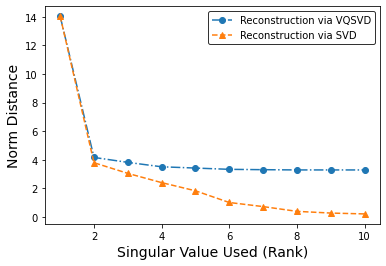

In [215]:
err_subfull, err_local, err_SVD = [], [], []
U, D, V_dagger = np.linalg.svd(A, full_matrices=True)

# Calculate the Frobenius-norm error
for i in range(rank):
    lowrank_mat = U[:, :i] @ np.diag(D[:i]) @ V_dagger[:i, :]
    recons_mat = u[:i,:].T @ np.diag(d[:i]) @ v[:i, :].conj()
    err_local.append(np.linalg.norm(lowrank_mat - recons_mat)) 
    err_subfull.append(np.linalg.norm(A - recons_mat))
    err_SVD.append(np.linalg.norm(A - lowrank_mat))


# Plot
fig, ax = plt.subplots()
ax.plot(list(range(1, rank+1)), err_subfull, "o-.", 
        label = 'Reconstruction via VQSVD')
ax.plot(list(range(1, rank+1)), err_SVD, "^--", 
        label='Reconstruction via SVD')
plt.xlabel('Singular Value Used (Rank)', fontsize = 14)
plt.ylabel('Norm Distance', fontsize = 14)
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('k')

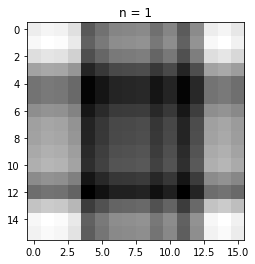

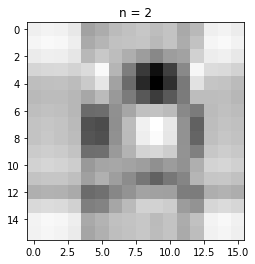

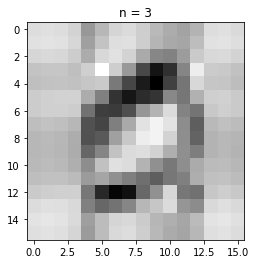

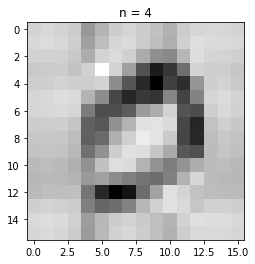

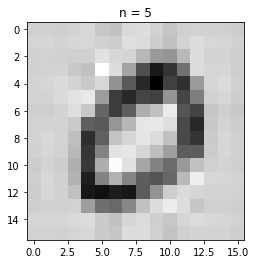

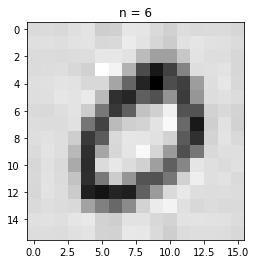

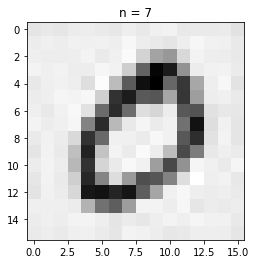

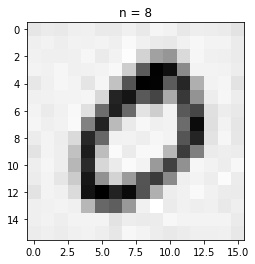

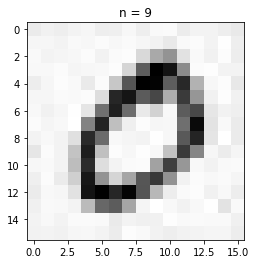

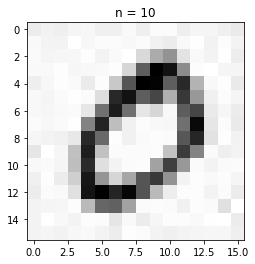

In [216]:
for i in range(1,10+1,1):
    reconstimg = U[:, :i] @ np.diag(D[:i]) @ V_dagger[:i, :]
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

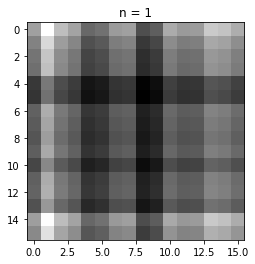

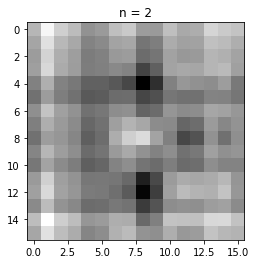

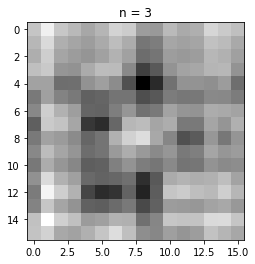

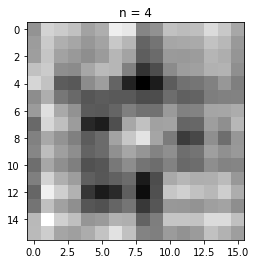

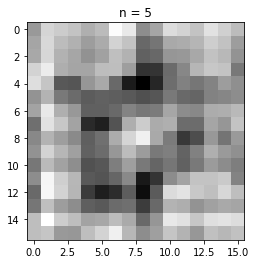

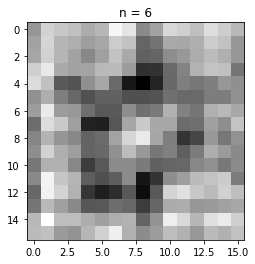

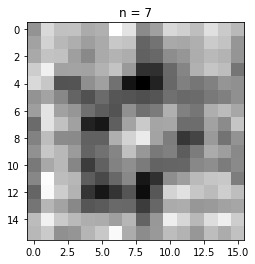

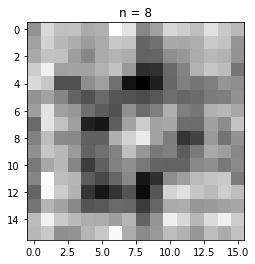

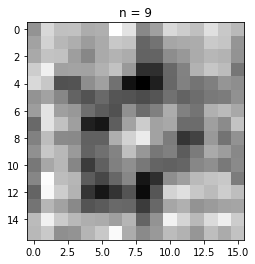

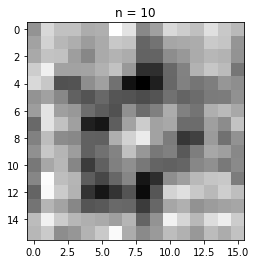

In [217]:
for i in range(1,rank+1,1):
    reconstimg = np.real(u[:i, :].T @ np.diag(d[:i]) @ v[:i, :].conj())
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()